In [66]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [67]:
from matplotlib import rcParams 
rcParams['figure.figsize'] = 15, 5 
sns.set_style('darkgrid')
pd.options.display.float_format = "{:,.4f}".format

# Data exploration
---

In [68]:
passengers = pd.read_csv('AirlinePassengerSatisfaction.csv') 
passengers.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0000,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0000,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0000,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0000,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0000,satisfied


In [69]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [70]:
passengers.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [71]:
passengers.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,"103,904.0000","103,904.0000","103,904.0000","103,904.0000","103,904.0000","103,904.0000","103,904.0000","103,904.0000","103,904.0000","103,904.0000","103,904.0000","103,904.0000","103,904.0000","103,904.0000","103,904.0000","103,904.0000","103,904.0000","103,904.0000","103,904.0000","103,594.0000"
mean,"51,951.5000","64,924.2105",39.3797,"1,189.4484",2.7297,3.0603,2.7569,2.9769,3.2021,3.2504,3.4394,3.3582,3.3824,3.3511,3.6318,3.3043,3.6404,3.2864,14.8156,15.1787
std,"29,994.6455","37,463.8123",15.1150,997.1473,1.3278,1.5251,1.3989,1.2776,1.3295,1.3495,1.3191,1.3330,1.2884,1.3156,1.1809,1.2654,1.1757,1.3123,38.2309,38.6987
min,0.0000,1.0000,7.0000,31.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,"25,975.7500","32,533.7500",27.0000,414.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,3.0000,3.0000,3.0000,2.0000,0.0000,0.0000
50%,"51,951.5000","64,856.5000",40.0000,843.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,4.0000,4.0000,4.0000,4.0000,4.0000,3.0000,4.0000,3.0000,0.0000,0.0000
75%,"77,927.2500","97,368.2500",51.0000,"1,743.0000",4.0000,4.0000,4.0000,4.0000,4.0000,4.0000,5.0000,4.0000,4.0000,4.0000,5.0000,4.0000,5.0000,4.0000,12.0000,13.0000
max,"103,903.0000","129,880.0000",85.0000,"4,983.0000",5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,5.0000,"1,592.0000","1,584.0000"


In [72]:
passengers.drop(['Unnamed: 0', 'id', 'Arrival Delay in Minutes'], axis=1, inplace=True)

# Data visualization
---

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

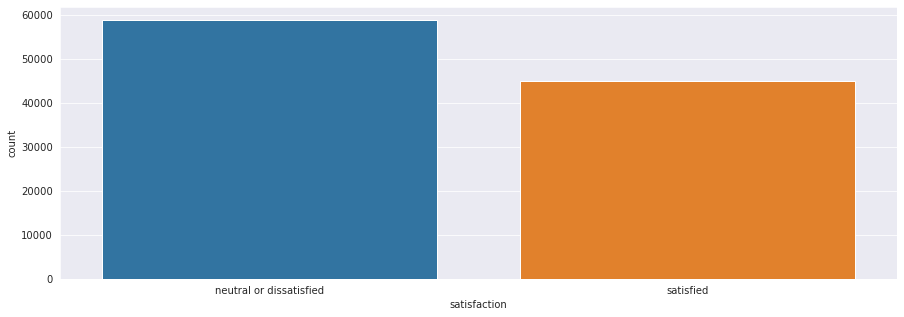

In [73]:
sns.countplot(x=passengers['satisfaction'])

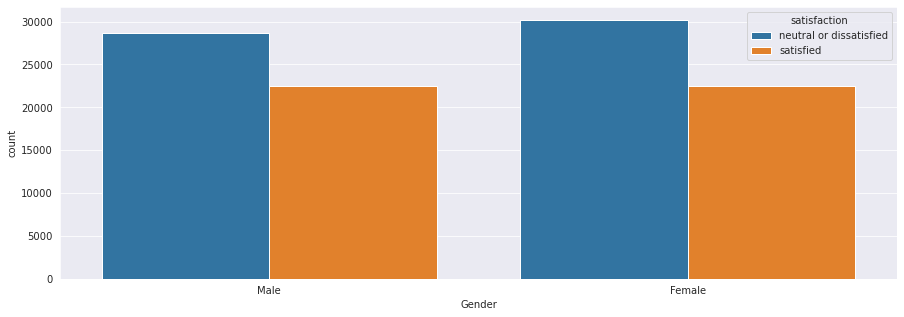

In [74]:
ax = sns.countplot(x=passengers['Gender'], hue=passengers['satisfaction'])

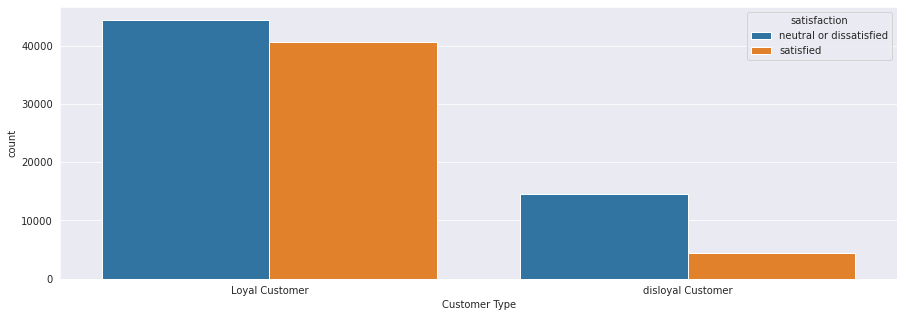

In [75]:
ax = sns.countplot(x=passengers['Customer Type'], hue=passengers['satisfaction'])

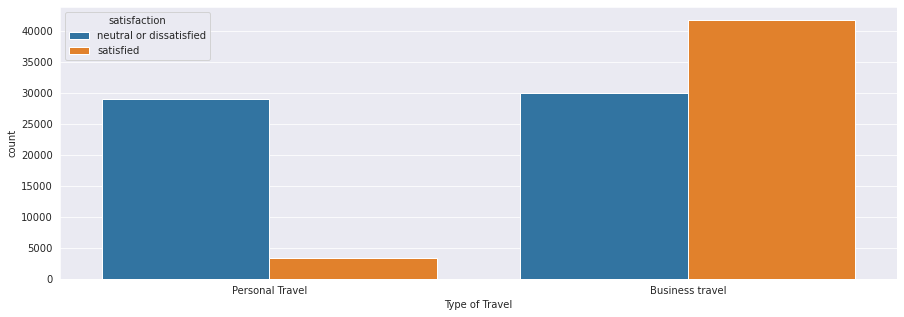

In [76]:
ax = sns.countplot(x=passengers['Type of Travel'], hue=passengers['satisfaction'])

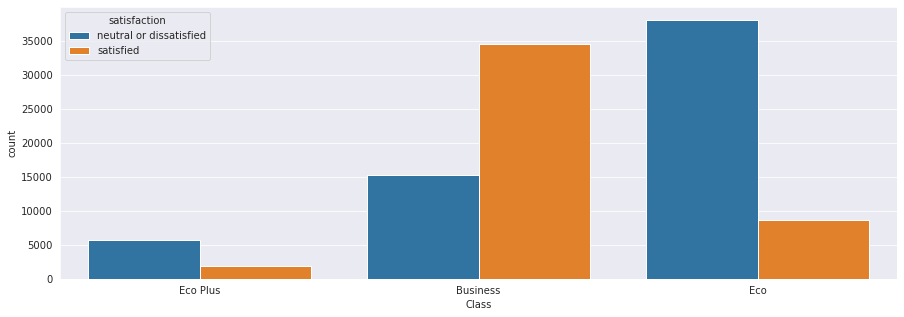

In [77]:
ax = sns.countplot(x=passengers['Class'], hue=passengers['satisfaction'])

/home/bryan/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/bryan/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/bryan/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/brya

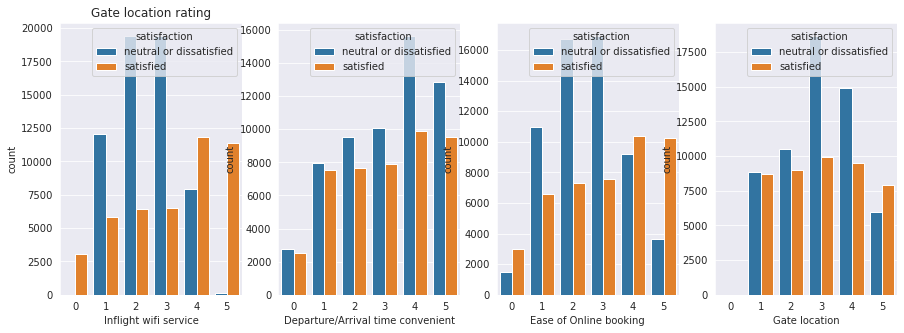

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

sns.countplot(passengers["Inflight wifi service"], hue=passengers['satisfaction'], ax=axes[0])
axes[0].set_title('Inflight wifi ratings')

sns.countplot(passengers["Departure/Arrival time convenient"], hue=passengers['satisfaction'], ax=axes[1])
axes[0].set_title('Time convenience ratings')

sns.countplot(passengers["Ease of Online booking"], hue=passengers['satisfaction'], ax=axes[2])
axes[0].set_title('Online booking ratings')

sns.countplot(passengers["Gate location"], hue=passengers['satisfaction'], ax=axes[3])
axes[0].set_title('Gate location rating')

plt.show()

/home/bryan/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/bryan/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/bryan/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/brya

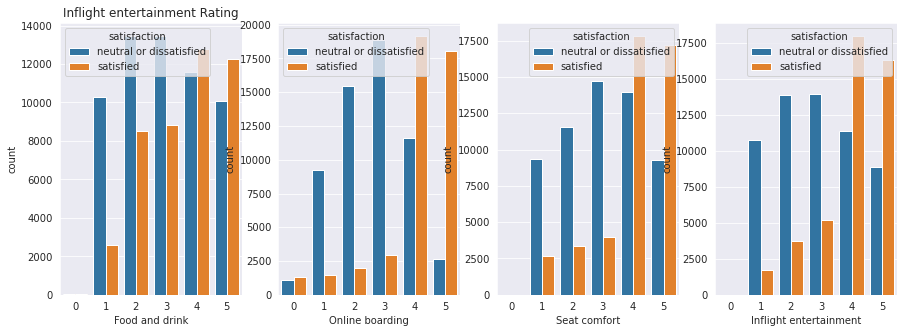

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

sns.countplot(passengers["Food and drink"], hue=passengers['satisfaction'], ax=axes[0])
axes[0].set_title('Food and drink')

sns.countplot(passengers["Online boarding"], hue=passengers['satisfaction'], ax=axes[1])
axes[0].set_title('Online boarding Rating')

sns.countplot(passengers["Seat comfort"], hue=passengers['satisfaction'], ax=axes[2])
axes[0].set_title('Seat comfort Rating')

sns.countplot(passengers["Inflight entertainment"], hue=passengers['satisfaction'], ax=axes[3])
axes[0].set_title('Inflight entertainment Rating')

plt.show()

/home/bryan/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/bryan/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/bryan/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/brya

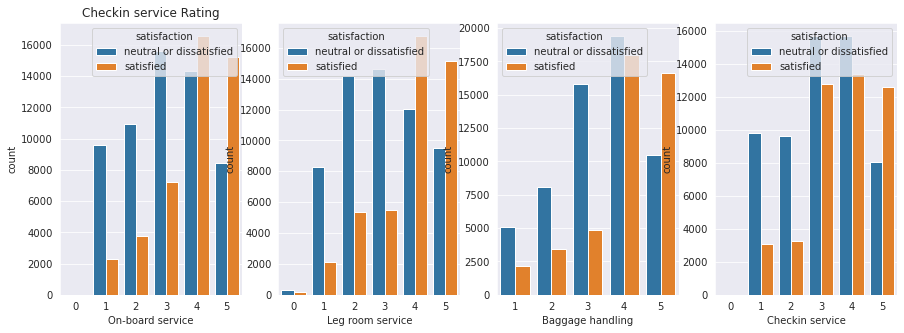

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

sns.countplot(passengers["On-board service"], hue=passengers['satisfaction'], ax=axes[0])
axes[0].set_title('On-board service Rating')

sns.countplot(passengers["Leg room service"], hue=passengers['satisfaction'], ax=axes[1])
axes[0].set_title('Leg room service Rating')

sns.countplot(passengers["Baggage handling"], hue=passengers['satisfaction'], ax=axes[2])
axes[0].set_title('Baggage handling Rating')

sns.countplot(passengers["Checkin service"], hue=passengers['satisfaction'], ax=axes[3])
axes[0].set_title('Checkin service Rating')

plt.show()

/home/bryan/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/bryan/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


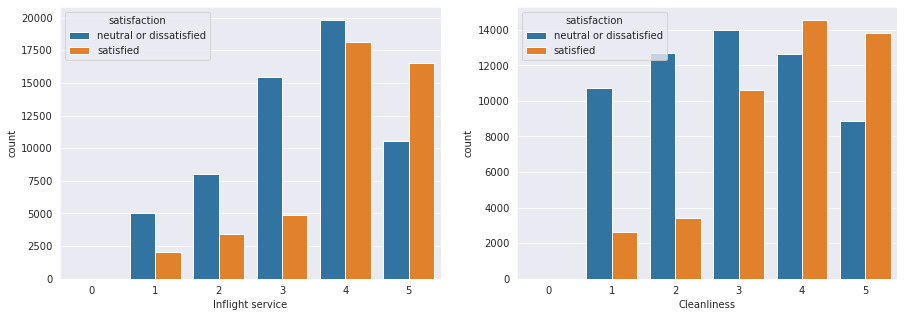

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.countplot(passengers["Inflight service"], hue=passengers['satisfaction'], ax=axes[0])

sns.countplot(passengers["Cleanliness"], hue=passengers['satisfaction'], ax=axes[1])

plt.show()

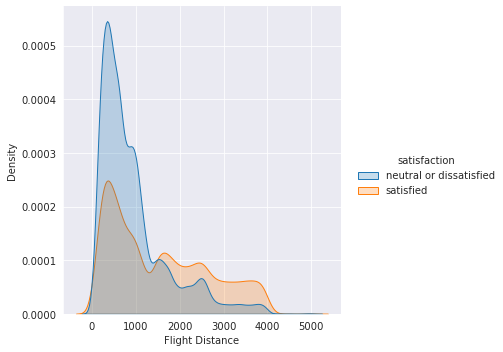

In [82]:
sns.displot(x=passengers['Flight Distance'], hue=passengers['satisfaction'], kind='kde', fill=True)

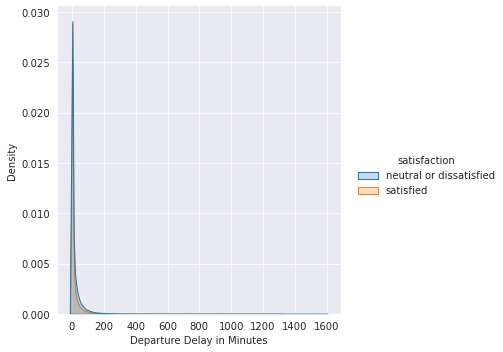

In [83]:
sns.displot(x=passengers['Departure Delay in Minutes'], hue=passengers['satisfaction'], kind='kde', fill=True)

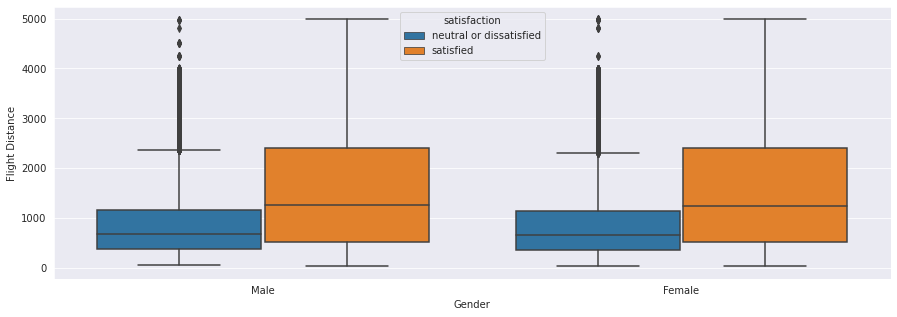

In [84]:
sns.boxplot(x=passengers['Gender'], y=passengers['Flight Distance'], hue=passengers['satisfaction'])
plt.show()

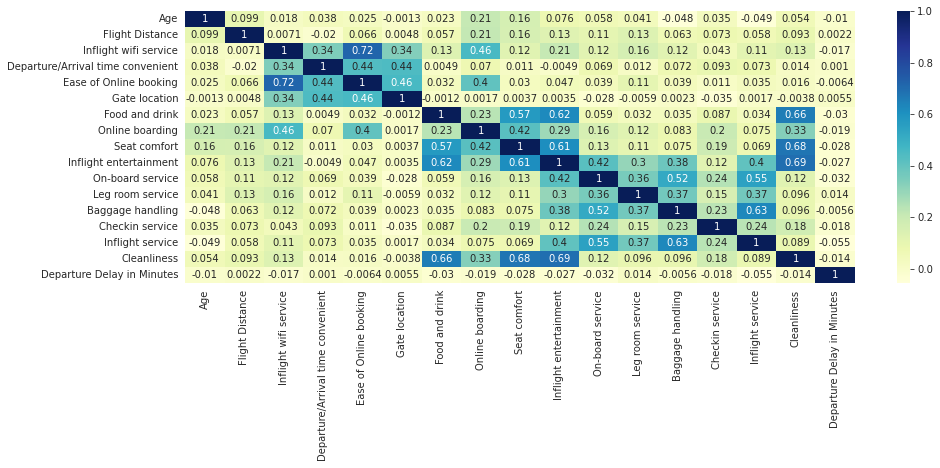

In [85]:
sns.heatmap(passengers.corr(), cmap='YlGnBu', annot=True)
plt.show()

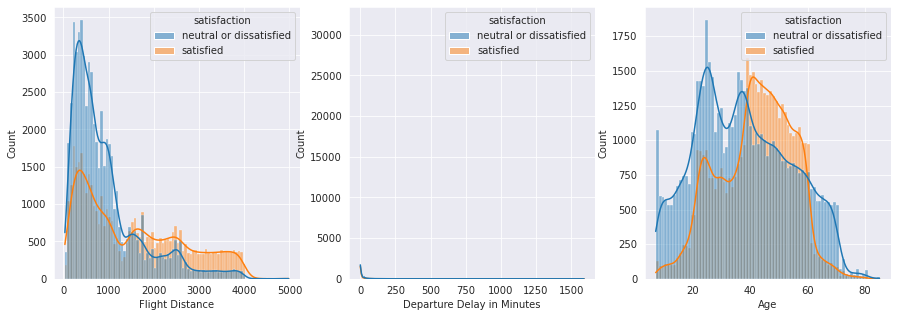

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.histplot(data=passengers, x="Flight Distance", hue='satisfaction', kde=True, ax=axes[0])

sns.histplot(data=passengers, x="Departure Delay in Minutes", hue='satisfaction', kde=True, ax=axes[1])

sns.histplot(data=passengers, x="Age", hue='satisfaction', kde=True, ax=axes[2])

plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

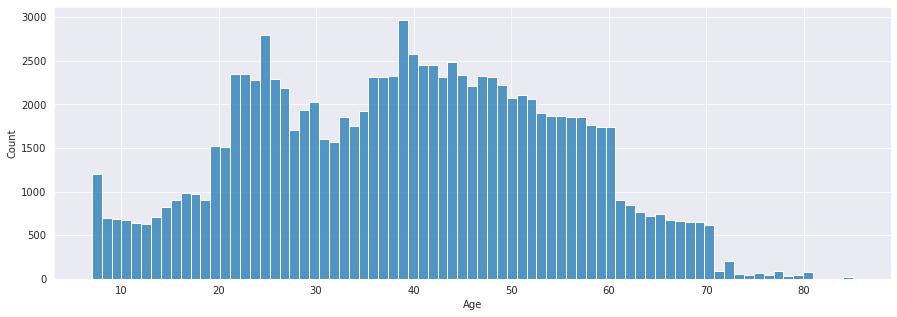

In [87]:
sns.histplot(data=passengers, x='Age')

<AxesSubplot:xlabel='Age', ylabel='Count'>

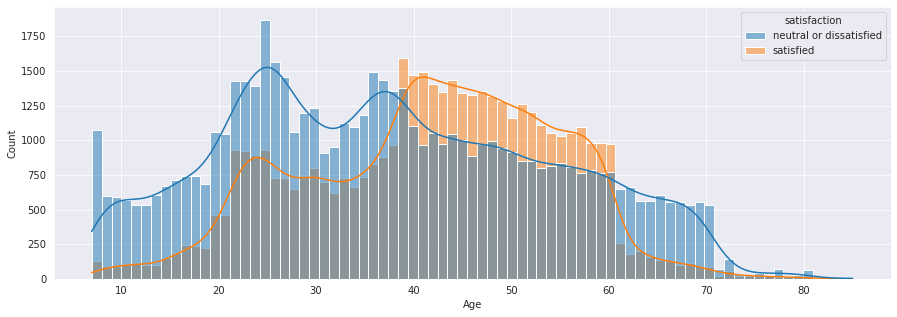

In [88]:
sns.histplot(data=passengers, x="Age", hue='satisfaction', kde=True)

In [89]:
#sns.pairplot(passengers, hue='satisfaction')

# Data cleanup and splitting

In [90]:
passengers = pd.get_dummies(data=passengers, columns=['Gender', 'Customer Type', 'Type of Travel', 'satisfaction'], drop_first=True)
pd.set_option('display.max_columns', None)
passengers.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,satisfaction_satisfied
0,13,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,1,0,1,0
1,25,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,1,1,0,0
2,26,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,0,0,1
3,25,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,0,0,0,0
4,61,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,1,0,0,1


In [91]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

Class = passengers['Class']
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(Class)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

#One hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
onehot_encoded = onehot_encoded.astype(int)
stuff = pd.DataFrame(data=onehot_encoded)

passengers['Business Class'] = stuff[0]
passengers['Eco Class'] = stuff[1]
passengers['Eco Plus Class'] = stuff[2]

passengers.drop(['Class'], axis=1, inplace=True)
passengers.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,satisfaction_satisfied,Business Class,Eco Class,Eco Plus Class
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,1,0,1,0,0,0,1
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,1,1,0,0,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,0,0,1,1,0,0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,0,0,0,0,1,0,0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,1,0,0,1,1,0,0


In [92]:
storage = passengers
temp = pd.Series(storage['Departure Delay in Minutes'])
temp = temp.astype(int)
passengers['Departure Delay in Minutes'] = temp

# Logistic Regression
---

In [115]:
from sklearn.model_selection import train_test_split

X = passengers.drop(['satisfaction_satisfied'], axis=1)
y = passengers['satisfaction_satisfied']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [94]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Age                                103904 non-null  int64
 1   Flight Distance                    103904 non-null  int64
 2   Inflight wifi service              103904 non-null  int64
 3   Departure/Arrival time convenient  103904 non-null  int64
 4   Ease of Online booking             103904 non-null  int64
 5   Gate location                      103904 non-null  int64
 6   Food and drink                     103904 non-null  int64
 7   Online boarding                    103904 non-null  int64
 8   Seat comfort                       103904 non-null  int64
 9   Inflight entertainment             103904 non-null  int64
 10  On-board service                   103904 non-null  int64
 11  Leg room service                   103904 non-null  int64
 12  Ba

In [116]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=2000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [117]:
predictions = logmodel.predict(X_test)

In [118]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
log_acc = logmodel.score(X_test,y_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     17641
           1       0.87      0.84      0.85     13531

    accuracy                           0.88     31172
   macro avg       0.88      0.87      0.87     31172
weighted avg       0.88      0.88      0.88     31172

[[15984  1657]
 [ 2223 11308]]


# Random Forest
---

In [98]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [99]:
# predict the test set results with criterion gini index
y_pred_gini = clf_gini.predict(X_test)
from sklearn.metrics import accuracy_score

gini_acc = accuracy_score(y_test, y_pred_gini)
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8847


In [100]:
#Let's also compare the train-set and test-set accuracy and check for overfitting.

y_pred_train_gini = clf_gini.predict(X_train)
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8845
Test set score: 0.8847


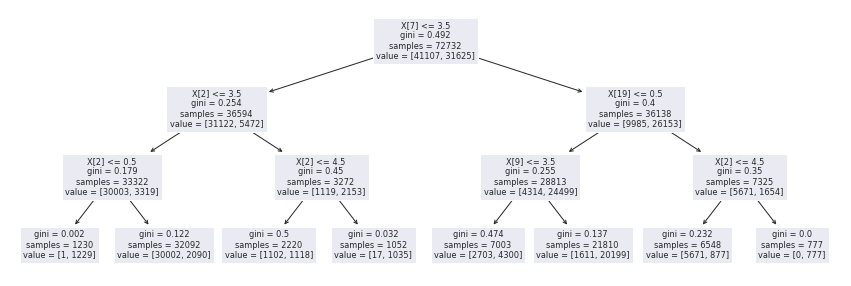

In [101]:
from sklearn import tree
tree.plot_tree(clf_gini) 
plt.show()

In [102]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [103]:
rfc_pred = rfc.predict(X_test)
forest_acc = accuracy_score(y_test, rfc_pred)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, rfc_pred)))

Model accuracy score: 0.9598


# KNN
---

In [104]:
from sklearn.preprocessing import StandardScaler

X = passengers.drop(['satisfaction_satisfied'], axis=1)
y = passengers['satisfaction_satisfied']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(data=X_scaled, columns=X.columns)

In [105]:
X.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Business Class,Eco Class,Eco Plus Class
0,-1.7453,-0.7315,0.2036,0.6162,0.1738,-1.5473,1.3523,-0.1855,1.1831,1.2317,0.4794,-0.2668,0.3118,0.5498,1.1564,1.3059,0.2664,1.0150,-0.4728,1.4906,-0.9569,-0.9043,3.5868
1,-0.9514,-0.9572,0.2036,-0.6952,0.1738,0.0181,-1.6563,-0.1855,-1.8493,-1.7691,-1.8492,1.2534,-0.5350,-1.8210,0.3058,-1.7423,-0.3614,1.0150,2.1152,-0.6709,1.0450,-0.9043,-0.2788
2,-0.8852,-0.0476,-0.5495,-0.6952,-0.5411,-0.7646,1.3523,1.2965,1.1831,1.2317,0.4794,-0.2668,0.3118,0.5498,0.3058,1.3059,-0.3875,-0.9852,-0.4728,-0.6709,1.0450,-0.9043,-0.2788
3,-0.9514,-0.6292,-0.5495,1.2719,1.6034,1.5835,-0.9042,-0.9265,-1.0912,-1.0189,-1.0730,1.2534,-0.5350,-1.8210,0.3058,-0.9803,-0.0998,-0.9852,-0.4728,-0.6709,1.0450,-0.9043,-0.2788
4,1.4304,-0.9782,0.2036,-0.0395,0.1738,0.0181,0.6001,1.2965,1.1831,-0.2687,-0.2968,0.4933,0.3118,-0.2405,-0.5447,-0.2182,-0.3875,1.0150,-0.4728,-0.6709,1.0450,-0.9043,-0.2788


In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [109]:
from sklearn.neighbors import KNeighborsClassifier

# will append scores here for plotting later
test_scores = []
train_scores = []

# testing k values from 1-6
for i in range(1,7):
    # create a model with k=i
    knn = KNeighborsClassifier(i)
    # train the model
    knn.fit(X_train,y_train)
    print('model: ',i," generated")
    
    # append scores. 
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

model:  1  generated
model:  2  generated
model:  3  generated
model:  4  generated
model:  5  generated
model:  6  generated


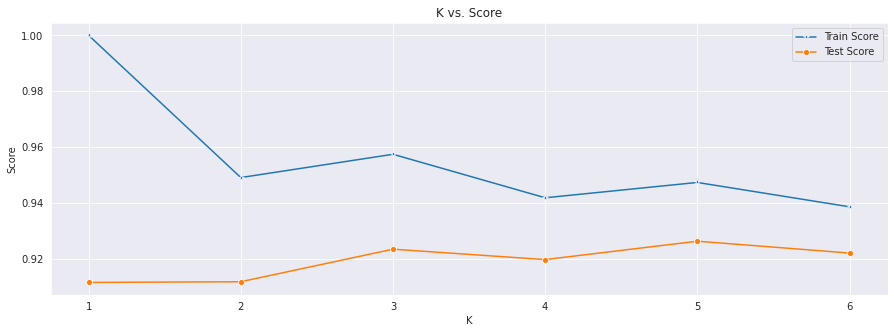

In [111]:
sns.lineplot(x=range(1,7), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1,7), y=test_scores, marker='o', label='Test Score')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

In [114]:
knn = KNeighborsClassifier(6)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)
knn_acc = knn.score(X_test,y_test)

In [113]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     17664
           1       0.96      0.86      0.90     13508

    accuracy                           0.92     31172
   macro avg       0.93      0.91      0.92     31172
weighted avg       0.93      0.92      0.92     31172

[[17192   472]
 [ 1956 11552]]


# Comparison
---

<AxesSubplot:>

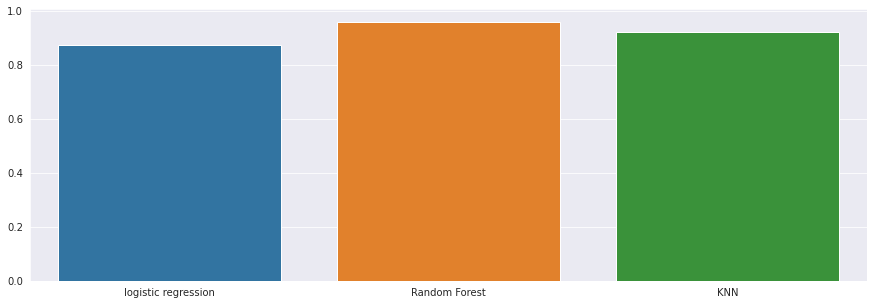

In [133]:
accs = pd.DataFrame()
accs['logistic regression'] = [log_acc]
accs['Random Forest'] = [forest_acc]
accs['KNN'] = [knn_acc]
sns.barplot(data=accs)